

# AAI612: Deep Learning & its Applications


*Notebook 3.5: Detecting Breast Cancer*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week3/Notebook3.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

## Dataset

This is an analysis of the Breast Cancer Wisconsin (Diagnostic) [DataSet](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). This data set was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin,USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector

Attribute Information:

- ID number 
- Diagnosis (M = malignant, B = benign) 3-32

Ten real-valued features are computed for each cell nucleus:

1) radius (mean of distances from center to points on the perimeter) 
2) texture (standard deviation of gray-scale values) 
3) perimeter 
4) area 
5) smoothness (local variation in radius lengths) 
6) compactness (perimeter^2 / area - 1.0) 
7) concavity (severity of concave portions of the contour) 
8) concave points (number of concave portions of the contour) 
9) symmetry 
10) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.  There are no missing attribute values.  The class distribution is 357 benign and 212 malignant.

## The Problem

The objective is to classify whether the breast cancer is benign or malignant.  Let us start by importing the dataset:

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/harmanani/AAI612/main/Week3/breast_cancer/data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
# Deelete the last column!
del data['Unnamed: 32']

## The Solution: Deep Learning

Read features and label

In [4]:
#Skip the first two columns: The ID and the diagnosis
X = data.iloc[:, 2:].values

# Now, read the diagnosis
y = data.iloc[:, 1].values

Encoding categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Exploring the Dataset

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
X_train.shape

(455, 30)

In [10]:
X_valid.shape
y_valid.shape

(114,)

Furthermore, we can see that these 28x28 images are represented as a collection of unsigned 8-bit integer values between 0 and 255, the values corresponding with a pixel's grayscale value where `0` is black, `255` is white, and all other values are in between:

In [11]:
X_train.dtype

dtype('float64')

In [12]:
X_train.min()

np.float64(0.0)

In [13]:
X_train.max()

np.float64(4254.0)

In [14]:
X_train[0]

array([1.005e+01, 1.753e+01, 6.441e+01, 3.108e+02, 1.007e-01, 7.326e-02,
       2.511e-02, 1.775e-02, 1.890e-01, 6.331e-02, 2.619e-01, 2.015e+00,
       1.778e+00, 1.685e+01, 7.803e-03, 1.449e-02, 1.690e-02, 8.043e-03,
       2.100e-02, 2.778e-03, 1.116e+01, 2.684e+01, 7.198e+01, 3.840e+02,
       1.402e-01, 1.402e-01, 1.055e-01, 6.499e-02, 2.894e-01, 7.664e-02])

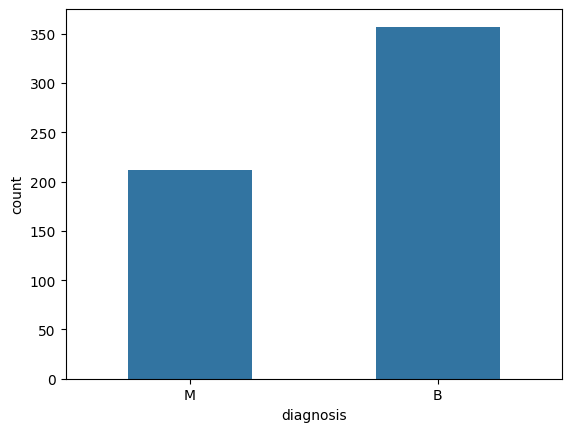

In [15]:
import seaborn as sns
ax = sns.countplot(x=data["diagnosis"], width=0.5)

### Scaling!

Let us scale the features!

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

And now notice the difference!

In [17]:
X_train[0]

array([-1.15036482, -0.39064196, -1.12855021, -0.95876358,  0.3109837 ,
       -0.5959945 , -0.80259612, -0.80249002,  0.29453906,  0.0942515 ,
       -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,  0.28149837,
       -0.60451206, -0.46900701, -0.61170002,  0.05798237, -0.35763702,
       -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,  0.34249851,
       -0.73009743, -0.81232053, -0.75798367, -0.01614761, -0.38503402])

## Creating the Model

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several *layers* and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *neurons*. Each [neuron](https://developers.google.com/machine-learning/glossary#neuron) will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will output the prediction

### Instantiating the Model

To begin, we will use Keras's [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [102]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Creating the Input Layer

Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class.

In [103]:
from tensorflow.keras.layers import Dense, Dropout

We will learn more about activation functions later, but for now, we will use the `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

In [104]:
model.add(Dense(units=30, activation='leaky_relu', input_shape=(30,)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adding dropout to prevent overfitting.  More about this one later :-)

In [105]:
model.add(Dropout(rate=0.1))

### Creating the Hidden Layer

Now we will add an additional densely connected layer. Again, much more will be said about these later, but for now know that these layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [106]:
model.add(Dense(units = 16, activation='leaky_relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units = 16, activation='leaky_relu'))
model.add(Dropout(rate=0.1))

### Creating the Output Layer

Finally, we will add an output layer. This layer uses the activation function `sigmoid` which will result with an output probability between 0 and 1.  The reason is that this is a classification problem and we the prediction is the highest value:

In [107]:
model.add(Dense(units = 1, activation='sigmoid'))

### Summarizing the Model

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [108]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,715 (6.70 KB)

 Trainable params: 1,715 (6.70 KB)

 Non-trainable params: 0 (0.00 B)

Note the number of trainable parameters. Each of these can be adjusted during training and will contribute towards the trained model's guesses.

### Compiling the Model

Again, more details are to follow, but the final step we need to do before we can actually train our model with data is to [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) it. Here we specify a [loss function](https://developers.google.com/machine-learning/glossary#loss) which will be used for the model to understand how well it is performing during training. We also specify that we would like to track `accuracy` while the model trains:

In [109]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

Run the cell below to train the model. We will discuss its output after the training completes:

In [110]:
history = model.fit(
    X_train, y_train, epochs=150, verbose=1, validation_data=(X_valid, y_valid)
)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5259 - loss: 0.6985 - val_accuracy: 0.8684 - val_loss: 0.4066
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9062 - loss: 0.3904 - val_accuracy: 0.9123 - val_loss: 0.2785
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9388 - loss: 0.2806 - val_accuracy: 0.9298 - val_loss: 0.2148
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9431 - loss: 0.2430 - val_accuracy: 0.9298 - val_loss: 0.1781
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9549 - loss: 0.1734 - val_accuracy: 0.9386 - val_loss: 0.1531
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9638 - loss: 0.1334 - val_accuracy: 0.9386 - val_loss: 0.1346
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9575 - loss: 0.1300 - val_accuracy: 0.9474 - val_loss: 0.1225
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9587 - loss: 0.1193 - val_accuracy: 0.

In [111]:
# Predicting the Test set results
y_pred = model.predict(X_valid)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [112]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)

In [113]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/114)*100))

Our accuracy is 97.36842105263158%


### Confusion Matrix

A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.  So, (1, 1) and (0,0) are properly predicted, benign or malignant.

<img src="images/3-s2.0-B9780323911979000138-f14-09-9780323911979.jpg"/>

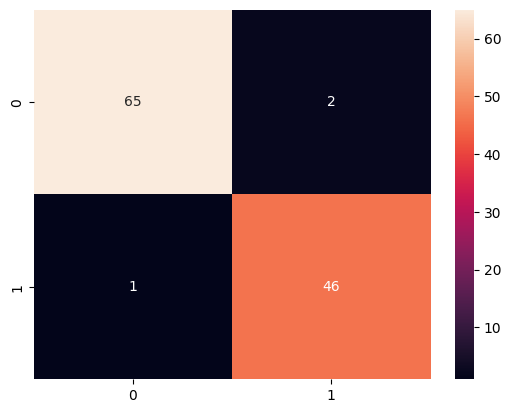

In [114]:
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [115]:
chart_x = range(1,151)

In [116]:
chart_y_train = history.history['loss']
chart_y_test = history.history['val_loss']
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


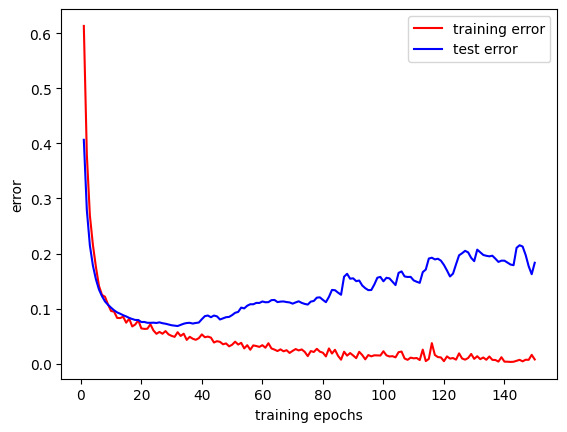

In [117]:
import matplotlib.pyplot as plt

def plot_learning():
    plt.plot(chart_x, chart_y_train, 'r-',label='training error')
    plt.plot(chart_x, chart_y_test, 'b-',
    label='test error')
    plt.xlabel('training epochs')
    plt.ylabel('error')
    plt.legend()
    plt.show()
plot_learning()

### Observing Accuracy

For each of the 5 epochs, notice the `accuracy` and `val_accuracy` scores. `accuracy` states how well the model did for the epoch on all the training data. `val_accuracy` states how well the model did on the validation data, which if you recall, was not used at all for training the model.

The model did quite well! The accuracy quickly reached close to 95%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). We'll explore the process of inference in a later exercise. 